## Task 1 Simulation
#### By Romina Goodarzi

Please open this notebook on Google Colab.

Saving Task 1 simulation data.xlsx to Task 1 simulation data.xlsx
    ID  initial_amt  PIF_amt
0  2_1            1        4
1  2_2            3        8
2  2_3           14       10
3  2_4            0        0
4  2_5           14       12


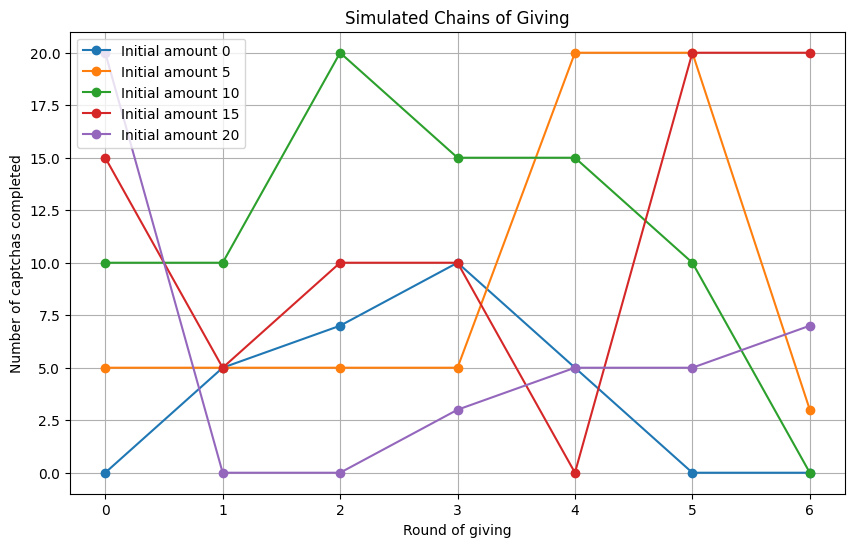

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Access the uploaded file by its key
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Display the first few rows of the data
print(data.head())

# Function to simulate the chains of giving
def simulate_chains(data, initial_amounts, num_rounds=6):
    chains = {initial_amt: [initial_amt] for initial_amt in initial_amounts}

    for initial_amt in initial_amounts:
        current_amount = initial_amt
        for _ in range(num_rounds):
            # Select a random PIF amount from the data based on the current amount
            possible_pif_amounts = data['PIF_amt'][data['initial_amt'] == current_amount].values
            if len(possible_pif_amounts) > 0:
                next_amount = np.random.choice(possible_pif_amounts)
                chains[initial_amt].append(next_amount)
                current_amount = next_amount
            else:
                # If there are no matching PIF amounts, end the chain
                chains[initial_amt].append(0)
                break

    return chains

# Function to plot the simulated chains
def plot_chains(chains, num_rounds=6):
    plt.figure(figsize=(10, 6))

    for initial_amt, chain in chains.items():
        plt.plot(range(len(chain)), chain, marker='o', label=f'Initial amount {initial_amt}')

    plt.xlabel('Round of giving')
    plt.ylabel('Number of captchas completed')
    plt.title('Simulated Chains of Giving')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define initial amounts and simulate chains
initial_amounts = [0, 5, 10, 15, 20]
chains = simulate_chains(data, initial_amounts)

# Plot the chains
plot_chains(chains)

## Thank You!
Thank you for reviewing my notebook. I welcome any feedback you may have.